In [48]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#%% Preparer les donnees
iris = load_iris()
print(iris.feature_names, iris.target_names)
X, y = iris.data, iris.target

# Creer un data frame avec les noms des attributs et les classes
df = pd.DataFrame(data = X, columns=(iris.feature_names))
df.insert(df.shape[1], 'type', y)

# Preparer les ensembles d'entrainement et d'apprentissage
X = df.drop('type', axis = 1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


# Méthode K-NN

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



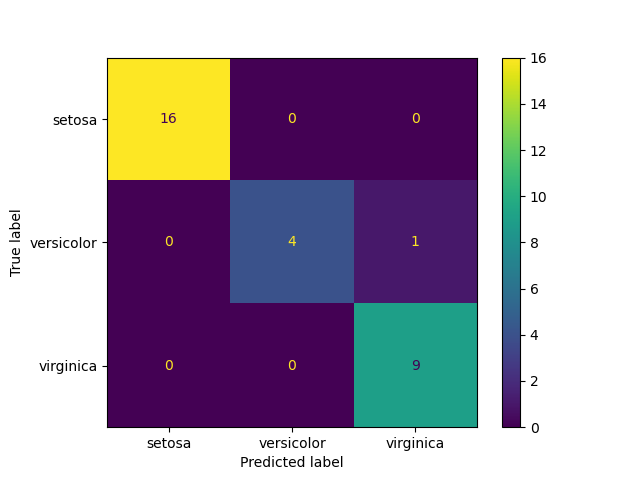

In [49]:
from sklearn.neighbors import KNeighborsClassifier

c = KNeighborsClassifier(n_neighbors=5)

c.fit(X=X_train, y=y_train)

y_pred = c.predict(X=X_test)

# Précision, rappel, exactitude
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=iris.target_names)

print(report)

conf = confusion_matrix(y_true=y_test, y_pred=y_pred)

ConfusionMatrixDisplay(conf, display_labels=iris.target_names).plot()
plt.show()


# Bayes Naïf

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      0.80      0.80         5
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



/opt/homebrew/Caskroom/miniconda/base/envs/DataMining/lib/python3.11/site-packages/sklearn/naive_bayes.py:1529: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


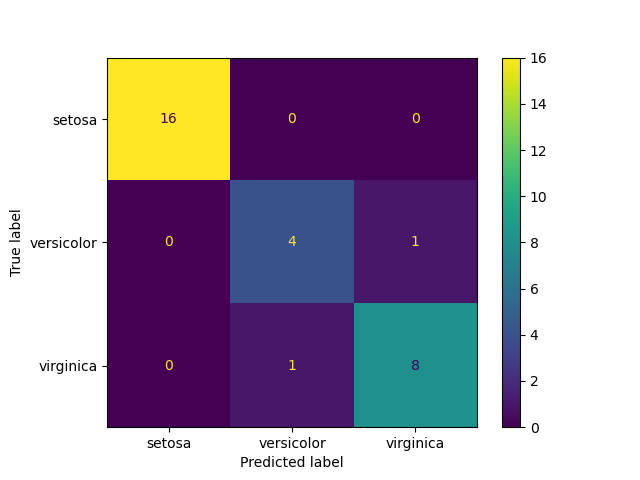

In [50]:
from sklearn.naive_bayes import CategoricalNB

# Tres important : mettre alpha=0, pour autoriser les divisions par 0
c = CategoricalNB(alpha=0)
c.fit(X=X_train, y=y_train)

y_pred = c.predict(X=X_test)

# Précision, rappel, exactitude
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=iris.target_names)

print(report)

conf = confusion_matrix(y_true=y_test, y_pred=y_pred)

ConfusionMatrixDisplay(conf, display_labels=iris.target_names).plot()
plt.show()

# Arbres de décision

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



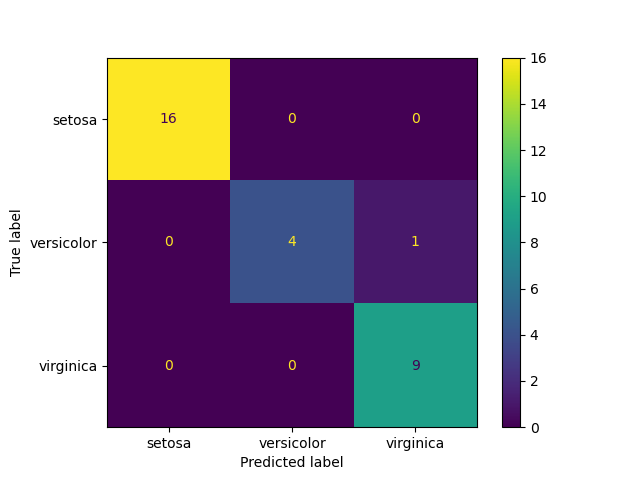

In [52]:
from sklearn.tree import DecisionTreeClassifier

c = DecisionTreeClassifier(criterion="entropy")
c.fit(X=X_train, y=y_train)

y_pred = c.predict(X=X_test)

# Précision, rappel, exactitude
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=iris.target_names)

print(report)

conf = confusion_matrix(y_true=y_test, y_pred=y_pred)

ConfusionMatrixDisplay(conf, display_labels=iris.target_names).plot()
plt.show()